# Estimating errors between two trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator

## Useful functions
### How to test a solution?

In [ ]:
def solution(X, Y):
    return np.abs(np.trapz(*X.transpose()[::-1]) - np.trapz(*Y.transpose()[::-1]))

In [ ]:
validator.test(solution, display = False)

### Distance between two points

In [39]:
dist = lambda P, Q : np.sqrt(np.sum((P-Q)**2 ))

def dist_to_line(A1, A2, B):
    """ distance from B to line (A1A2)"""
    # equation of the line (A1A2) is defined as by = ax + c
    b, a = A2 - A1
    c = b*A1[1] - a*A1[0]
    return abs(b*B[1] - a*B[0] - c)/np.hypot(a, b)

### Finding the intersection point of two line segments
Let $p_1$ and $p_2$ be the (2D) endpoints of one segment and let $q_1$ and $q_2$ be the endpoints of the other. A parametrization of these lines are defined as:
$$
\left\{\begin{array}{l}{p_{1}+t_p\left(p_{2}-p_{1}\right)} \\ {p_{3}+t_q\left(p_{4}-p_{3}\right)}\end{array}\right.
$$
where $t_p, t_q \in [0,1]$. Thus, the segments intersect iff there exists $(s,t)$ such that:
$$p_1+t_p(p_2-p_1) = q_1+t_q(q_2-q_1)$$
i.e.
$$t_q(q_2-q_1) + t_p(p_1-p_2) = p_1 - q_1$$
We can define our system using matrices ($p_1$, $p_2$, $q_1$, $q_2$ being a column vector of size 2) :
$$
\underbrace{\left[
    \begin{array}{ll}
        q_2-q_1 & p_1-p_1\end{array}
\right]}_A \times 
\underbrace{\left[
    \begin{array}{l}
        t_q \\ t_p\end{array}
\right]}_T = 
\underbrace{\left[
    \begin{array}{ll}
        p_1 & q_1\end{array}
\right]}_B
$$
* if a solution $(t_p, t_q)$ exists and is in $[0,1]\times[0,1]$, the segments intersect (at $p_{1}+t_p(p_{2}-p_{1})$).
* if A is not inversible, the segments have the same slope (we need to test if segments are colinear or parallel)

In [3]:
def find_intersection(p1, p2, q1, q2, display = False):
    """ Find intersection point between [p1, p2] and [q1, q2] 
    Parameters :
        - p1, p2, q1, q2 : np.ndarrays of shape (2,)
    Returns : the coordinates of the intersection points,  
        if the line segments intersect
    
    [TODO] Manage the case where the matrix is singular
    """
    a = np.array([q2-q1, p1-p2]).transpose()
    if display:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-o')
        plt.plot([q1[0], q2[0]], [q1[1], q2[1]], '-o')
    if np.linalg.det(a): # if a is invertible (if lines intersect)
        b = p1 - q1
        t = np.linalg.solve(a,b)
        if np.all(0 < t) and np.all(t < 1): # segments intersect
            intersection = p1 + t[1]*(p2-p1)
            if display:
                plt.plot(*(intersection), 'o')
            return intersection 
    else: # TODO ?
        pass
    return None

### Suite ..

In [ ]:
# coder intersections

---
## Solution 1 - Bases triangulaires

In [ ]:
# T # trajectory , two colums matrix 
# P # path follown, two colums matrix

lgT=len(T)
lgP=len(P)

depMin=min (T[0][0], P[0][0])
endMin=min (T[lgT][0], P[LgP][0])

# interval  of  computing is [depmin, endMin]

Subdivision =[]


---
## Solution 2 - Pivots

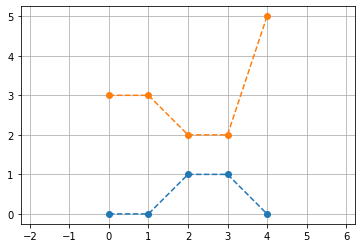

In [4]:
from matplotlib.patches import Polygon
testname = "test/[test0]simple.txt"
X = np.loadtxt(testname, skiprows=0, max_rows=2, unpack=True)
Y = np.loadtxt(testname, skiprows=2, max_rows=2, unpack=True)

plt.figure()
plt.plot(*X.transpose(), '--o', *Y.transpose(), '--o')
plt.axis("equal")
plt.grid()
plt.show()

In [26]:
def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    if min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) : #p2 is the closest point
        return True
    else :
        return False

In [40]:
NTRIANGLE = 0
def triangle_area(A, B, C, ax):
    global NTRIANGLE
    NTRIANGLE += 1
    ax.add_patch(Polygon([A, B, C], facecolor=["grey", "lightgrey"][NTRIANGLE % 2], ec = "black", alpha = 0.3))
    return 0.5 * abs((B[0]-A[0])*(C[1]-A[1]) - (C[0]-A[0])*(B[1]-A[1]))

We are defining `si` and `tj` instead of simply using `S[i]` and `T[j]`, in order to be capable of redefining these points in the case of intersection.

In [42]:
def error_btw_trajectories(S, T):
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    plt.xticks(list(range(int(min(X[::,0])), int(max(X[::,0]))+1)))
    plt.axis("equal")
    plt.grid()
    error = 0
    while i < len(S) - 1 and j < len(T) - 1:
        intersect = find_intersection(si, S[i+1], tj, T[j+1])
        if np.all(intersect): # if the segments [S_i, S_i+1] and [T_i, T_i+1] intersect
            # Compute area of the triangle intersect, si, tj
            error += triangle_area(si, tj, intersect)
            si, tj = intersect, intersect
        else:
            if find_next_focus_point1(si, S[i+1], tj, T[j+1]):
                old_point = si
                si, i = S[i+1], i+1
            else:
                old_point = tj
                tj, j = T[j+1], j+1
            # Compute area of the triangle old_point, si, tj
            error += triangle_area(old_point, si, tj, ax)
    
    if i == len(S) - 1:
        for j in range(j, len(T)-1):
            error += triangle_area(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        for i in range(i, len(S)-1):
            error += triangle_area(tj, S[i], S[i+1], ax)
    plt.show()
    return error

[test0]simple.txt	

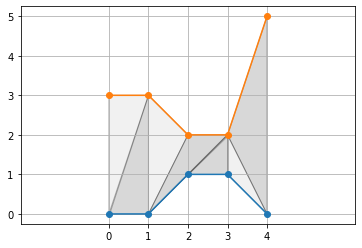

ok 	 The expected value is indeed 9.0
[test1]negative.txt	

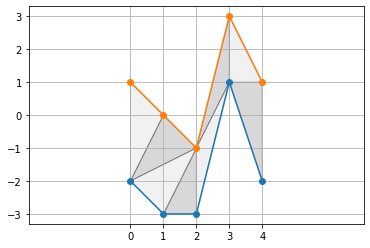

ok 	 The expected value is indeed 10.0
[test2]simple2.txt	

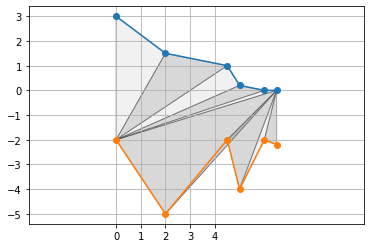

NOT ok 	 The expected value is 29.325, but the output value is 30.325.


False

In [43]:
validator.test(error_btw_trajectories)